# CUSTOMER CHURN PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
dataset = pd.read_csv('Machine_learning_dataset_olist.csv')

In [3]:
dataset.head()

,order_id,customer_id,customer_city,customer_state,order_status,order_purchase_date,order_reached_date,order_estimate_delivery_date,product_id,product_category_name,...,price,freight_value,shipp_limit_date,payment_type,payment_installments,payment_value,review_score,seller_city,seller_state,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,delivered,2017-09-13,2017-09-20,2017-09-29,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,...,58.90,13.29,2017-09-19,credit_card,2.0,72.19,5.0,volta redonda,SP,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,NaN,NaN,delivered,2017-04-26,2017-05-12,2017-05-15,e5f2d52b802189ee658865ca93d83a8f,pet_shop,...,239.90,19.93,2017-05-03,credit_card,3.0,259.83,4.0,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,NaN,NaN,delivered,2018-01-14,2018-01-22,2018-02-05,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,...,199.00,17.87,2018-01-18,credit_card,5.0,216.87,5.0,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,NaN,NaN,delivered,2018-08-08,2018-08-14,2018-08-20,7634da152a4610f1595efa32f14722fc,perfumaria,...,12.99,12.79,2018-08-15,credit_card,2.0,25.78,4.0,franca,SP,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,NaN,NaN,delivered,2017-02-04,2017-03-01,2017-03-17,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,...,199.90,18.14,2017-02-13,credit_card,3.0,218.04,5.0,loanda,PR,64b576fb70d441e8f1b2d7d446e483c5


In [4]:
dataset.shape

(115706, 21)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   order_id                      115706 non-null  object 
 1   customer_id                   115706 non-null  object 
 2   customer_city                 50398 non-null   object 
 3   customer_state                50398 non-null   object 
 4   order_status                  115706 non-null  object 
 5   order_purchase_date           115706 non-null  object 
 6   order_reached_date            115706 non-null  object 
 7   order_estimate_delivery_date  115706 non-null  object 
 8   product_id                    115706 non-null  object 
 9   product_category_name         114068 non-null  object 
 10  seller_id                     115706 non-null  object 
 11  price                         115706 non-null  float64
 12  freight_value                 115706 non-nul

In [6]:
dataset.describe()

,price,freight_value,payment_installments,payment_value,review_score
count,115706.000000,115706.000000,115703.000000,115703.000000,114845.000000
mean,119.907518,19.981514,2.940823,171.812134,4.080317
std,182.679745,15.719324,2.776211,265.659388,1.347799
min,0.850000,0.000000,0.000000,0.000000,1.000000
25%,39.900000,13.080000,1.000000,60.840000,4.000000
50%,74.900000,16.280000,2.000000,108.110000,5.000000
75%,132.900000,21.160000,4.000000,188.940000,5.000000
max,6735.000000,409.680000,24.000000,13664.080000,5.000000


In [7]:
dataset.head(1)

,order_id,customer_id,customer_city,customer_state,order_status,order_purchase_date,order_reached_date,order_estimate_delivery_date,product_id,product_category_name,...,price,freight_value,shipp_limit_date,payment_type,payment_installments,payment_value,review_score,seller_city,seller_state,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,campos dos goytacazes,RJ,delivered,2017-09-13,2017-09-20,2017-09-29,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,...,58.9,13.29,2017-09-19,credit_card,2.0,72.19,5.0,volta redonda,SP,871766c5855e863f6eccc05f988b23cb


In [8]:
dataset.drop("shipp_limit_date",axis=1,inplace=True)

In [9]:
dataset.shape

(115706, 20)

# CHANGING DATA TYPE

# convert date as object into date as datatype

In [10]:
dataset['order_purchase_date'] = pd.to_datetime(dataset['order_purchase_date'])
dataset['order_reached_date'] = pd.to_datetime(dataset['order_reached_date'])
dataset['order_estimate_delivery_date'] = pd.to_datetime(dataset['order_estimate_delivery_date'])


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115706 entries, 0 to 115705
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   order_id                      115706 non-null  object        
 1   customer_id                   115706 non-null  object        
 2   customer_city                 50398 non-null   object        
 3   customer_state                50398 non-null   object        
 4   order_status                  115706 non-null  object        
 5   order_purchase_date           115706 non-null  datetime64[ns]
 6   order_reached_date            115706 non-null  datetime64[ns]
 7   order_estimate_delivery_date  115706 non-null  datetime64[ns]
 8   product_id                    115706 non-null  object        
 9   product_category_name         114068 non-null  object        
 10  seller_id                     115706 non-null  object        
 11  price        

In [12]:
dataset.isnull().sum()

order_id                            0
customer_id                         0
customer_city                   65308
customer_state                  65308
order_status                        0
order_purchase_date                 0
order_reached_date                  0
order_estimate_delivery_date        0
product_id                          0
product_category_name            1638
seller_id                           0
price                               0
freight_value                       0
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      861
seller_city                         0
seller_state                        0
customer_unique_id                  0
dtype: int64

In [13]:
# drop a columns which are over missing values

In [14]:
dataset.drop(['customer_city','customer_state'],axis=1,inplace=True)

In [15]:
dataset.shape

(115706, 18)

In [16]:
dataset['product_category_name'].fillna('UNKNOW',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4856\2943675558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['product_category_name'].fillna('UNKNOW',inplace=True)


In [17]:
dataset.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_date               0
order_reached_date                0
order_estimate_delivery_date      0
product_id                        0
product_category_name             0
seller_id                         0
price                             0
freight_value                     0
payment_type                      3
payment_installments              3
payment_value                     3
review_score                    861
seller_city                       0
seller_state                      0
customer_unique_id                0
dtype: int64

# EDA

In [18]:
avg_review_score = dataset['review_score'].mean()

In [19]:
avg_review_score

np.float64(4.080316948931168)

In [20]:
dataset['review_score'].fillna(avg_review_score,inplace= True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4856\512034081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['review_score'].fillna(avg_review_score,inplace= True)


In [21]:
dataset.isnull().sum()

order_id                        0
customer_id                     0
order_status                    0
order_purchase_date             0
order_reached_date              0
order_estimate_delivery_date    0
product_id                      0
product_category_name           0
seller_id                       0
price                           0
freight_value                   0
payment_type                    3
payment_installments            3
payment_value                   3
review_score                    0
seller_city                     0
seller_state                    0
customer_unique_id              0
dtype: int64

In [22]:
dataset.drop(['customer_id','order_status','seller_id','seller_city','seller_state'],axis=1,inplace=True)

In [23]:
dataset.head(1)

,order_id,order_purchase_date,order_reached_date,order_estimate_delivery_date,product_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,review_score,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,2017-09-20,2017-09-29,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.9,13.29,credit_card,2.0,72.19,5.0,871766c5855e863f6eccc05f988b23cb


In [24]:
dataset.isnull().sum()

order_id                        0
order_purchase_date             0
order_reached_date              0
order_estimate_delivery_date    0
product_id                      0
product_category_name           0
price                           0
freight_value                   0
payment_type                    3
payment_installments            3
payment_value                   3
review_score                    0
customer_unique_id              0
dtype: int64

In [25]:
dataset.dropna(inplace=True)

In [26]:
dataset.isnull().sum()

order_id                        0
order_purchase_date             0
order_reached_date              0
order_estimate_delivery_date    0
product_id                      0
product_category_name           0
price                           0
freight_value                   0
payment_type                    0
payment_installments            0
payment_value                   0
review_score                    0
customer_unique_id              0
dtype: int64

In [27]:
dataset.shape

(115703, 13)

In [28]:
dataset.head(1)

,order_id,order_purchase_date,order_reached_date,order_estimate_delivery_date,product_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,review_score,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,2017-09-20,2017-09-29,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.9,13.29,credit_card,2.0,72.19,5.0,871766c5855e863f6eccc05f988b23cb


#  FEATURE enginEering

# average_review

In [200]:
avg_review = dataset.groupby('customer_unique_id')['review_score'].mean().reset_index(name='avg_review_score')


# Average delivery delay

In [201]:
dataset['delivery_delay'] = (dataset['order_reached_date'] - dataset['order_estimate_delivery_date']).dt.days
avg_delay = dataset.groupby('customer_unique_id')['delivery_delay'].mean().reset_index(name='avg_delivery_delay')


# Average feright (shipping ) values

In [202]:
avg_freight = dataset.groupby('customer_unique_id')['freight_value'].mean().reset_index(name='avg_freight')

# Average no payment installement

In [203]:
avg_installments = dataset.groupby('customer_unique_id')['payment_installments'].mean().reset_index(name='avg_payment')

# RECENCY DAYS

In [204]:
dataset.head()

,order_id,order_purchase_date,order_reached_date,order_estimate_delivery_date,product_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,review_score,customer_unique_id,delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,2017-09-20,2017-09-29,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,credit_card,2.0,72.19,5.0,871766c5855e863f6eccc05f988b23cb,-9
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26,2017-05-12,2017-05-15,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,credit_card,3.0,259.83,4.0,eb28e67c4c0b83846050ddfb8a35d051,-3
2,000229ec398224ef6ca0657da4fc703e,2018-01-14,2018-01-22,2018-02-05,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,199.00,17.87,credit_card,5.0,216.87,5.0,3818d81c6709e39d06b2738a8d3a2474,-14
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08,2018-08-14,2018-08-20,7634da152a4610f1595efa32f14722fc,perfumaria,12.99,12.79,credit_card,2.0,25.78,4.0,af861d436cfc08b2c2ddefd0ba074622,-6
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04,2017-03-01,2017-03-17,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,199.90,18.14,credit_card,3.0,218.04,5.0,64b576fb70d441e8f1b2d7d446e483c5,-16


In [194]:
max_date = dataset['order_purchase_date'].max()


In [195]:
cutoff_date = max_date - pd.Timedelta(days=90)


In [196]:
last_purchase = dataset.groupby('customer_unique_id')['order_purchase_date'].max().reset_index(name='last_purchase')


In [197]:
last_purchase['recency_days'] = (max_date - last_purchase['last_purchase']).dt.days



# IS_CHURN

In [198]:

last_purchase['is_churn'] = last_purchase['last_purchase'] < cutoff_date


In [185]:
dataset.head(1)

,order_id,order_purchase_date,order_reached_date,order_estimate_delivery_date,product_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,review_score,customer_unique_id,delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,2017-09-20,2017-09-29,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.9,13.29,credit_card,2.0,72.19,5.0,871766c5855e863f6eccc05f988b23cb,-9


 # recency_days

In [186]:
last_purchase = dataset.groupby('customer_unique_id')['order_purchase_date'].max().reset_index()
last_purchase.rename(columns={'order_purchase_date': 'last_purchase_date'}, inplace=True)

# Calculate recency_days = (max_date - last_purchase_date)
last_purchase['recency_days'] = (max_date - last_purchase['last_purchase_date']).dt.days

# TOP CATEGORY

In [187]:


top_category = dataset.groupby(['customer_unique_id', 'product_category_name'])['order_id'].count().reset_index()
top_category = top_category.sort_values(['customer_unique_id', 'order_id'], ascending=[True, False])
top_category = top_category.drop_duplicates('customer_unique_id')  # keep the top one


# ORDER FREQUENCY

In [188]:
order_freq = dataset.groupby('customer_unique_id')['order_id'].count().reset_index(name='order_count')


# TOTAL PRODUCTS

In [189]:
total_products = dataset.groupby('customer_unique_id')['product_id'].count().reset_index(name='total_product')

 # TENURE – how long they’ve been a customer

In [190]:
tenure = dataset.groupby('customer_unique_id')['order_purchase_date'].min().reset_index(name='first_purchase_date')


In [191]:
tenure['tenure_days'] = (max_date - tenure['first_purchase_date']).dt.days


In [192]:
dataset.head(3)

,order_id,order_purchase_date,order_reached_date,order_estimate_delivery_date,product_id,product_category_name,price,freight_value,payment_type,payment_installments,payment_value,review_score,customer_unique_id,delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13,2017-09-20,2017-09-29,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.9,13.29,credit_card,2.0,72.19,5.0,871766c5855e863f6eccc05f988b23cb,-9
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26,2017-05-12,2017-05-15,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.9,19.93,credit_card,3.0,259.83,4.0,eb28e67c4c0b83846050ddfb8a35d051,-3
2,000229ec398224ef6ca0657da4fc703e,2018-01-14,2018-01-22,2018-02-05,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,199.0,17.87,credit_card,5.0,216.87,5.0,3818d81c6709e39d06b2738a8d3a2474,-14


# COMBINE ALL FEATURES

In [205]:

from functools import reduce

new_dataset = [avg_review, avg_delay, avg_freight, avg_installments, last_purchase, top_category, order_freq, total_products,tenure]
features = reduce(lambda left, right: pd.merge(left, right, on='customer_unique_id', how='left'), new_dataset)

# Finally, add target
features = features.merge(last_purchase[['customer_unique_id', 'is_churn']], on='customer_unique_id', how='left')


In [206]:
features.head(1)

,customer_unique_id,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,last_purchase,recency_days,is_churn_x,product_category_name,order_id,order_count,total_product,first_purchase_date,tenure_days,is_churn_y
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,-5.0,12.0,8.0,2018-05-10,111,True,cama_mesa_banho,1,1,1,2018-05-10,111,True


In [207]:
features['avg_delivery_delay'].value_counts()

avg_delivery_delay
-14.000000    6743
-13.000000    5646
-15.000000    5076
-7.000000     4624
-8.000000     4599
              ... 
 2.600000        1
 5.600000        1
-3.200000        1
-26.571429       1
-15.285714       1
Name: count, Length: 478, dtype: int64

In [208]:
#features['is_churn'].value_counts()

In [209]:
features['is_churn_y'].value_counts()

is_churn_y
True     74827
False    18514
Name: count, dtype: int64

In [210]:
#(features['is_churn_x'] == features['is_churn_y']).all()


In [211]:
features.drop(columns='is_churn_y', inplace=True) 

In [212]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93341 entries, 0 to 93340
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_unique_id     93341 non-null  object        
 1   avg_review_score       93341 non-null  float64       
 2   avg_delivery_delay     93341 non-null  float64       
 3   avg_freight            93341 non-null  float64       
 4   avg_payment            93341 non-null  float64       
 5   last_purchase          93341 non-null  datetime64[ns]
 6   recency_days           93341 non-null  int64         
 7   is_churn_x             93341 non-null  bool          
 8   product_category_name  93341 non-null  object        
 9   order_id               93341 non-null  int64         
 10  order_count            93341 non-null  int64         
 11  total_product          93341 non-null  int64         
 12  first_purchase_date    93341 non-null  datetime64[ns]
 13  t

In [213]:
features.rename(columns={'is_churn_x': 'is_churn'}, inplace=True)


In [214]:
features.head(1)

,customer_unique_id,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,last_purchase,recency_days,is_churn,product_category_name,order_id,order_count,total_product,first_purchase_date,tenure_days
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,-5.0,12.0,8.0,2018-05-10,111,True,cama_mesa_banho,1,1,1,2018-05-10,111


# ENCODING

# handing categorical variable (encoding) 

In [215]:
# features = pd.get_dummies(features, columns=['product_category_name'], drop_first=True)

In [216]:
features.head(1)

,customer_unique_id,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,last_purchase,recency_days,is_churn,product_category_name,order_id,order_count,total_product,first_purchase_date,tenure_days
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,-5.0,12.0,8.0,2018-05-10,111,True,cama_mesa_banho,1,1,1,2018-05-10,111


In [219]:
import pandas as pd
from sklearn.utils import resample

# Step 1: Separate classes
df_majority = features[features['is_churn'] == 1]     # Class 1: 74,000+
df_minority = features[features['is_churn'] == 0]     # Class 0: 18,000+

# Step 2: Downsample class 1 to 18,000
df_majority_downsampled = resample(
    df_majority,
    replace=False,            # Sample without replacement
    n_samples=18514,          # Downsample to 18,000
    random_state=42
)

# Step 3: Combine with class 0 (already 18,000)
df_balanced = pd.concat([df_minority, df_majority_downsampled])

# Step 4: Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Optional: Check balance
print(df_balanced['is_churn'].value_counts())


is_churn
False    18514
True     18514
Name: count, dtype: int64


In [220]:
df_balanced['is_churn'].value_counts()

is_churn
False    18514
True     18514
Name: count, dtype: int64

In [221]:
df_balanced.drop(["customer_unique_id","product_category_name","last_purchase","first_purchase_date"],axis=1,inplace=True)

In [222]:
df_balanced.head(1)

,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,recency_days,is_churn,order_id,order_count,total_product,tenure_days
0,3.0,-9.0,14.41,2.0,64,False,1,1,1,64


In [223]:
# Assume you already created the target like this
#df_balanced.drop('avg_review_score',axis=1,inplace=True)

In [224]:
df_balanced.head(1)

,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,recency_days,is_churn,order_id,order_count,total_product,tenure_days
0,3.0,-9.0,14.41,2.0,64,False,1,1,1,64


# REMOVE OUTLIRES FOR MY FEATURES

In [225]:
def remove_outliers_iqr(features, column):
    Q1 = df_balanced[column].quantile(0.25)
    Q3 = df_balanced[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df_balanced[(df_balanced[column] >= lower) & (df_balanced[column] <= upper)]

# Apply to each numeric column where outliers matter
columns_to_check = ['avg_delivery_delay', 'avg_freight', 'avg_payment', 'recency_days', 'tenure_days']

for col in columns_to_check:
    df_balanced = remove_outliers_iqr(df_balanced, col)


# DATA VISUALION TO SEE OUTLIERS USING PLT AND SNS

# avreage freight

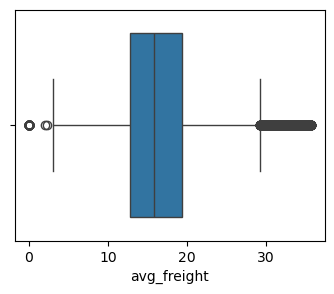

In [226]:
plt.figure(figsize=(4,3))
sns.boxplot(x='avg_freight',data=df_balanced)
plt.show()

# average payment


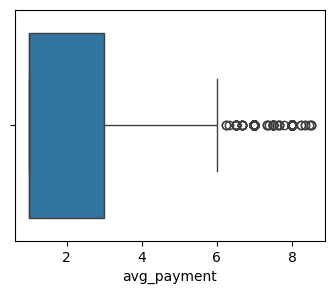

In [227]:
plt.figure(figsize=(4,3))
sns.boxplot(x='avg_payment',data=df_balanced)
plt.show()

# average delivery_days

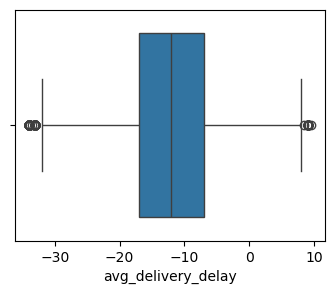

In [228]:
plt.figure(figsize=(4,3))
sns.boxplot(x='avg_delivery_delay',data=df_balanced)
plt.show()

# recency days

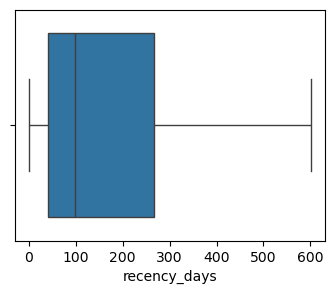

In [229]:
plt.figure(figsize=(4,3))
sns.boxplot(x='recency_days',data =df_balanced)
plt.show()

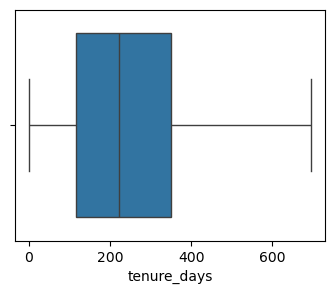

In [230]:
plt.figure(figsize=(4,3))
sns.boxplot(x='tenure_days',data=features)
plt.show()

In [231]:
df_balanced.head(1)

,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,recency_days,is_churn,order_id,order_count,total_product,tenure_days
0,3.0,-9.0,14.41,2.0,64,False,1,1,1,64


In [232]:
df_balanced.drop("total_product",axis=1,inplace=True)

In [233]:
df_balanced.head(1)

,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,recency_days,is_churn,order_id,order_count,tenure_days
0,3.0,-9.0,14.41,2.0,64,False,1,1,64


In [234]:
# Assuming order_estimated_delivery_date and order_delivered_customer_date are datetime

# # Proxy return: Late delivery AND poor review (review_score ≤ 2)
# dataset['proxy_return'] = ((dataset['delivery_delay'] > 0) & (dataset['review_score'] <= 2)).astype(int)


# TRAIN / TEST SPLIT

In [235]:
df_balanced.head(1)

,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,recency_days,is_churn,order_id,order_count,tenure_days
0,3.0,-9.0,14.41,2.0,64,False,1,1,64


In [236]:
from sklearn.model_selection import train_test_split

In [237]:
leak_features = ['avg_review_score', 'avg_delivery_delay', 'order_id','recency_days']


In [238]:
X = df_balanced.drop(columns=leak_features + ['is_churn'])
y = df_balanced['is_churn']

In [239]:
X.head()

,avg_freight,avg_payment,order_count,tenure_days
0,14.41,2.0,1,64
2,17.45,3.0,1,27
3,15.46,3.5,4,257
5,10.96,1.0,1,567
6,15.30,3.0,1,361


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [241]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [242]:
df_balanced.head(1)

,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,recency_days,is_churn,order_id,order_count,tenure_days
0,3.0,-9.0,14.41,2.0,64,False,1,1,64


In [243]:
#df_balanced.drop(["customer_unique_id","product_category_name","last_purchase","first_purchase_date"],axis=1,inplace=True)

# STANDARD NORMALIZATION

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler = StandardScaler()

In [246]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [247]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


# TRAIN MACHINE LEARNING MODEL

# 1) Logistic Regression

In [248]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

# EVALUATE THE MODEL BY Lgistic regression

In [249]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [250]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9620499513460915
[[2977   66]
 [ 168 2955]]
              precision    recall  f1-score   support

       False       0.95      0.98      0.96      3043
        True       0.98      0.95      0.96      3123

    accuracy                           0.96      6166
   macro avg       0.96      0.96      0.96      6166
weighted avg       0.96      0.96      0.96      6166



In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Grid for C (lower C = stronger regularization)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']  # Use liblinear for small datasets
}

grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.9632138675345715


In [252]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C=1, solver='liblinear', random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.96610444 0.96545572 0.9594485  0.96090835 0.96107056]
Average accuracy: 0.9625975162962315


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Step 1: Train the model (this is missing in your current code)
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# Step 2: Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Step 3: Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9879510135911893


In [254]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")


Train Accuracy: 0.9631807307084059
Test Accuracy: 0.9622121310411936


In [255]:
#!pip install shap

# SHAP

In [256]:
import shap

In [257]:
log_reg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [258]:
from sklearn.linear_model import LogisticRegression

# Re-train or ensure the model is defined
log_reg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
log_reg.fit(X_train, y_train)

# Use a sample of test data for SHAP
X_sample = X_test.copy()

# Assign model variable for SHAP
model = log_reg


In [259]:
explainer = shap.Explainer(model, X_sample)
shap_values = explainer(X_sample)


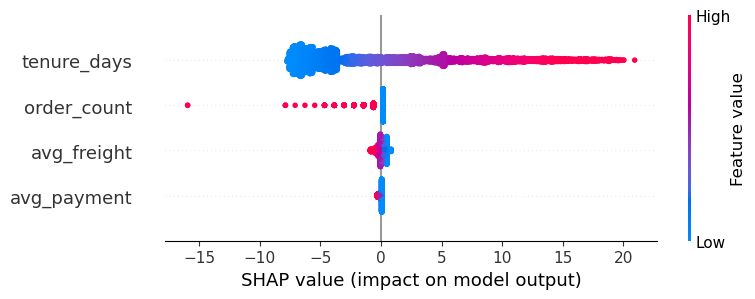

In [260]:
shap.summary_plot(shap_values, X_sample)


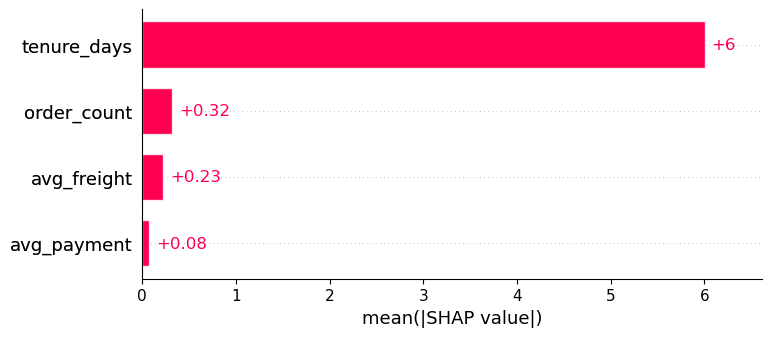

In [261]:
shap.plots.bar(shap_values)


In [155]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Step 1: Initialize the model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Step 2: Fit the model
# rf_model.fit(X_train, y_train)

# # Step 3: Predict
# y_pred = rf_model.predict(X_test)

# # Step 4: Evaluate
# print("✅ Accuracy:", accuracy_score(y_test, y_pred))
# print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


In [115]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2'],
#     'class_weight': ['balanced']
# }

# # Initialize the model
# rf = RandomForestClassifier(random_state=42)

# # Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best model
# best_rf = grid_search.best_estimator_

# # Predict and evaluate
# y_pred = best_rf.predict(X_test)
# print("Best Parameters:", grid_search.best_params_)
# print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9905962190984003


In [116]:
df_balanced.head(5)

,avg_review_score,avg_delivery_delay,avg_freight,avg_payment,recency_days,is_churn,order_id,order_count,tenure_days
0,5.0,-14.0,7.39,1.0,115,False,1,1,115
1,1.0,-13.0,14.10,1.0,200,True,1,1,200
2,5.0,-15.0,13.99,1.0,196,True,1,1,196
3,5.0,-11.0,15.10,1.0,211,True,1,1,211
4,5.0,-22.0,12.79,1.0,89,False,1,1,89


In [157]:
# avg_freight = float(input("Enter avg_freight: "))
# avg_payment = float(input("Enter avg_payment: "))
# order_count = int(input("Enter order_count: "))
# tenure_days = int(input("Enter tenure_days: "))

# manual_input = pd.DataFrame([{
#     'avg_freight': avg_freight,
#     'avg_payment': avg_payment,
#     'order_count': order_count,
#     'tenure_days': tenure_days
# }])

# # 🧼 Step 5: Scale manual input using same scaler
# manual_input_scaled = pd.DataFrame(scaler.transform(manual_input), columns=manual_input.columns)

# # 📊 Step 6: Predict
# prediction = rf_model.predict(manual_input_scaled)
# proba = rf_model.predict_proba(manual_input_scaled)

# print("\n✅ Churn Prediction:", prediction[0])
# print("🔍 Probability [Not Churn, Churn]:", proba[0])

Enter avg_freight:  100
Enter avg_payment:  100
Enter order_count:  100
Enter tenure_days:  10



✅ Churn Prediction: False
🔍 Probability [Not Churn, Churn]: [0.98 0.02]
